<a href="https://colab.research.google.com/github/MyeongHaHwang/2019DeepLearning_IE/blob/master/2019DeepLearning_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px">

<h1>2019 Deep Learning _ HW2</h1>

Optimizing non-linear neural network

- Myeong-Ha Hwang

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        #x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)     

In [24]:
net = Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [0]:
# create a stochastic gradient descent optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
# create a loss function
criterion = nn.NLLLoss()

In [0]:
batch_size=64

In [0]:
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])),
        batch_size=batch_size, shuffle=True)

In [0]:
log_interval=10

In [29]:
# run the main training loop

train_loss = []

for epoch in range(15):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        
        train_loss.append(loss.item())
        
        
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                           100. * batch_idx / len(train_loader), loss.data))
            
print(train_loss)






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.308219
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.194494
Train Epoch: 0 [1280/60000 (2%)]	Loss: 1.978575
Train Epoch: 0 [1920/60000 (3%)]	Loss: 1.599330
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.925813
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.617384
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.718899
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.677654
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.578272
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.496456
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.507979
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.346285
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.276586
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.395402
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.562534
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.380644
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.306176
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.338608
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.468337
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.267818
Train Epoch: 0 [12800/60000 (

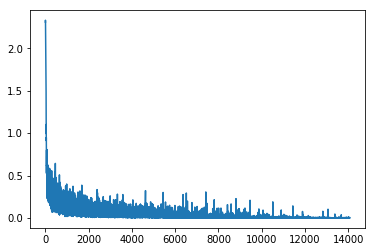

In [30]:
plt.plot(train_loss)
plt.show()

In [31]:
net_out = net(data)
loss = criterion(net_out, target)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:
loss.backward()
optimizer.step()

In [33]:
torch.cuda.is_available()

True

In [0]:
if batch_idx % log_interval == 0:
    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                           100. * batch_idx / len(train_loader), loss.data[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


[0.4472408890724182, 0.7259306907653809, 0.9199935793876648, 1.349153995513916, 1.5025877952575684, 1.7956898212432861, 1.9148200750350952, 2.2904279232025146, 2.809051990509033, 3.0340895652770996, 3.212017297744751, 3.5091190338134766, 3.7395052909851074, 4.021075248718262, 4.3023271560668945, 4.692558765411377, 5.009836673736572, 5.534585952758789, 5.751952648162842, 5.88334321975708, 6.122472763061523, 6.555715560913086, 6.792720317840576, 7.091131210327148, 7.384485244750977, 7.627551555633545, 7.757467746734619, 8.089768409729004, 8.19686508178711, 8.490774154663086, 8.820843696594238, 9.210474014282227, 9.802447319030762, 10.087133407592773, 10.414337158203125, 10.678359985351562, 10.879098892211914, 11.018780708312988, 11.2974853515625, 11.652925491333008, 12.069873809814453, 12.45366096496582, 12.749714851379395, 13.142558097839355, 13.374372482299805, 13.755099296569824, 14.104889869689941, 14.535802841186523, 14.831870079040527, 15.142239570617676, 15.519051551818848, 15.766

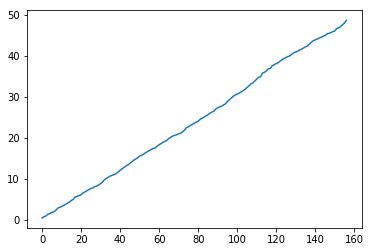

In [49]:
# run a test loop
test_loss = 0
correct = 0
test_loss_list = []
acc_list = []
for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    data = data.view(-1, 28 * 28)
    net_out = net(data)
    # sum up batch loss
    test_loss += criterion(net_out, target).data
    test_loss_list.append(test_loss.item())
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()
    acc_list.append(correct.item())

test_loss /= len(test_loader.dataset)
print(test_loss_list)
print(acc_list)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [0]:
correct += pred.eq(target.data).sum()

In [37]:
test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 0.0000, Accuracy: 9851/10000 (98%)



In [44]:
class HomeworkNet_linear(nn.Module):
    def __init__(self):
        super(HomeworkNet_linear, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        #x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return F.log_softmax(x) 
      
      
net = HomeworkNet_linear()
net

# create a stochastic gradient descent optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
# create a loss function
criterion = nn.NLLLoss()

batch_size=64

train_loss_linear = []

for epoch in range(15):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        
        train_loss_linear.append(loss.item())
        
        
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                           100. * batch_idx / len(train_loader), loss.data))
            
print(train_loss_linear)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.325686
Train Epoch: 0 [640/60000 (1%)]	Loss: 1.687006
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.856052
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.639956
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.670659
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.423563
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.525671
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.288758
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.309908
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.537591
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.394048
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.410488
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.264936
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.463455
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.351582
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.484941
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.271964
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.379897
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.257999
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.141600
Train Epoch: 0 [12800/60000 (

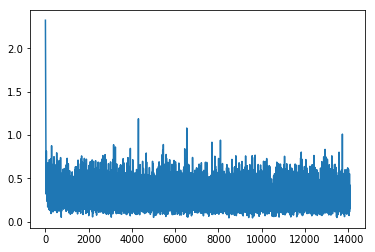

In [45]:
plt.plot(train_loss_linear)
plt.show()

In [59]:
print(train_loss)
print(train_loss_linear)
print(len(train_loss))
print(len(train_loss_linear))
#plt.plot(train_loss, train_loss_linear)

[2.3140788078308105, 2.284586191177368, 2.321214437484741, 2.2926461696624756, 2.29626727104187, 2.273561716079712, 2.277799129486084, 2.2500908374786377, 2.222872734069824, 2.2287650108337402, 2.2013132572174072, 2.1778314113616943, 2.159313201904297, 2.128103256225586, 2.1649436950683594, 2.069427490234375, 2.0984983444213867, 2.0944602489471436, 2.0576090812683105, 1.9526876211166382, 2.0326364040374756, 1.9211093187332153, 1.8200089931488037, 1.815414547920227, 1.7819418907165527, 1.785380482673645, 1.750150442123413, 1.7062262296676636, 1.6327869892120361, 1.5644643306732178, 1.4656882286071777, 1.360076904296875, 1.3418259620666504, 1.3429887294769287, 1.2268308401107788, 1.1548446416854858, 1.2210053205490112, 1.0164740085601807, 1.1104422807693481, 1.0640578269958496, 0.9798660278320312, 0.9024407267570496, 0.9479331970214844, 0.7931078672409058, 0.8762063980102539, 0.7519170641899109, 0.7963289618492126, 0.7137269377708435, 0.6945744752883911, 0.7394416332244873, 0.71222400665

In [0]:
# Make an initialized network
initialized_net_nonlinear = Net()

# save it with dictionary file
torch.save(initialized_net_nonlinear.state_dict(), 'C:/Users/BISYN/Desktop/Class/2019DeepLearning/initialized_net_nonlinear.pth')

# make new network and load initial weights
new_net_nonlinear = Net()
new_net_nonlinear.load_state_dict(torch.load('C:/Users/BISYN/Desktop/Class/2019DeepLearning/initialized_net_nonlinear.pth'))

In [71]:
### Adam Optimizer Training
class Net_Adam(nn.Module):
    def __init__(self):
        super(Net_Adam, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x) 
      
## Initialization
net = Net_Adam()
net

# create a stochastic gradient descent optimizer
optimizer = optim.Adam(net.parameters())
# create a loss function
criterion = nn.NLLLoss()

train_loss_Adam = []

for epoch in range(15):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        
        train_loss_Adam.append(loss.item())
        
        optimizer.step()
print(train_loss_Adam)
print(len(train_loss_Adam))    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


[2.3025834560394287, 2.207599401473999, 2.1331210136413574, 2.042072057723999, 2.1549084186553955, 1.8707859516143799, 1.6915003061294556, 1.755984902381897, 1.7150402069091797, 1.5761547088623047, 1.319420337677002, 1.1918416023254395, 1.2799830436706543, 1.1985715627670288, 1.0259356498718262, 0.9378972053527832, 1.007062554359436, 0.9029327630996704, 0.8789429068565369, 0.6680154204368591, 0.9269186854362488, 0.8430453538894653, 0.6664919853210449, 0.6947525143623352, 0.7675405740737915, 0.6732262969017029, 0.5319712162017822, 0.5926824808120728, 0.5050821304321289, 0.702186644077301, 0.7034462690353394, 0.48219791054725647, 0.4448159337043762, 0.6284679174423218, 0.34037837386131287, 0.3211476504802704, 0.6044219732284546, 0.39184850454330444, 0.4459533095359802, 0.468208909034729, 0.7391666769981384, 0.5483368635177612, 0.48073676228523254, 0.7009407877922058, 0.5088796019554138, 0.42950761318206787, 0.38052448630332947, 0.5907604694366455, 0.43940091133117676, 0.42991772294044495

In [73]:
### Adagrad Optimizer Training
class Net_Adagrad(nn.Module): ##################
    def __init__(self):
        super(Net_Adagrad, self).__init__() ##################
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x) 
      
## Initialization
net = Net_Adagrad() ##################
net

# create a stochastic gradient descent optimizer
optimizer = optim.Adagrad(net.parameters()) ##################
# create a loss function
criterion = nn.NLLLoss()

train_loss_Adagrad = [] ##################

for epoch in range(15):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        
        train_loss_Adagrad.append(loss.item()) ##################
        
        
        optimizer.step()
print(train_loss_Adagrad) ##################
print(len(train_loss_Adagrad)) ##################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


[2.283283233642578, 2.2511048316955566, 2.1893038749694824, 2.0593678951263428, 1.771628499031067, 1.679762840270996, 1.222902774810791, 1.2757973670959473, 1.4030033349990845, 1.447748064994812, 1.0344979763031006, 1.0808879137039185, 1.001795768737793, 0.8746040463447571, 0.7536172866821289, 0.6248780488967896, 0.7713227272033691, 0.6901196241378784, 0.6138606667518616, 0.6521941423416138, 0.6257634162902832, 0.7374897003173828, 0.6721526384353638, 0.4076375961303711, 0.39125439524650574, 0.6469459533691406, 0.7613046169281006, 0.6895310878753662, 0.6751073002815247, 0.2833266258239746, 0.38095664978027344, 0.37500497698783875, 0.4417663812637329, 0.33855557441711426, 0.4789665937423706, 0.4091290235519409, 0.3585277795791626, 0.509710431098938, 0.4011410176753998, 0.6307311654090881, 0.3459629416465759, 0.31573912501335144, 0.2224334180355072, 0.41309112310409546, 0.531455397605896, 0.29381176829338074, 0.49248000979423523, 0.42192649841308594, 0.4751480221748352, 0.3005867302417755

In [0]:
# Adam run a test loop
test_loss_Adam = 0
correct_Adam = 0
test_loss_list_Adam = []
acc_list_Adam = []
for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    data = data.view(-1, 28 * 28)
    net_out = net(data)
    # sum up batch loss
    test_loss_Adam += criterion(net_out, target).data
    test_loss_list.append(test_loss_Adam.item())
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()
    acc_list.append(correct.item())

test_loss_Adam /= len(test_loader.dataset)
print(test_loss_list)
print(acc_list)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss_Adam, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [78]:
### SGD Optimizer Training
class Net_SGD(nn.Module):
    def __init__(self):
        super(Net_SGD, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x) 
      
## Initialization
net = Net_SGD()
net

# create a stochastic gradient descent optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
# create a loss function
criterion = nn.NLLLoss()

train_loss_SGD = []

for epoch in range(15):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        
        train_loss_SGD.append(loss.item())
        
        
        optimizer.step()
print(train_loss_SGD) ##################
print(len(train_loss_SGD)) ##################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


[2.307119131088257, 2.290613889694214, 2.2928528785705566, 2.2817046642303467, 2.279505968093872, 2.31321382522583, 2.285991668701172, 2.3009097576141357, 2.2621078491210938, 2.267444610595703, 2.3046751022338867, 2.281031608581543, 2.271578073501587, 2.27880859375, 2.2544453144073486, 2.255674123764038, 2.277714490890503, 2.2685956954956055, 2.264983892440796, 2.256908893585205, 2.264373302459717, 2.2604446411132812, 2.2536280155181885, 2.248643398284912, 2.2496540546417236, 2.2365195751190186, 2.240936517715454, 2.2378673553466797, 2.244920253753662, 2.225815773010254, 2.2293951511383057, 2.2025232315063477, 2.213576555252075, 2.2162489891052246, 2.205852746963501, 2.219313144683838, 2.2370471954345703, 2.200512170791626, 2.2095065116882324, 2.195106267929077, 2.18593168258667, 2.1663315296173096, 2.1913511753082275, 2.1990339756011963, 2.1705050468444824, 2.147754669189453, 2.197070598602295, 2.1821396350860596, 2.138470411300659, 2.1724798679351807, 2.1522085666656494, 2.1822097301

In [76]:
### RMSprop Optimizer Training
class Net_RMSprop(nn.Module): ##################
    def __init__(self):
        super(Net_RMSprop, self).__init__() ##################
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x) 
      
## Initialization
net = Net_RMSprop() ##################
net

# create a stochastic gradient descent optimizer
optimizer = optim.RMSprop(net.parameters()) ##################
# create a loss function
criterion = nn.NLLLoss()

train_loss_RMSprop = [] ##################

for epoch in range(15):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        
        train_loss_RMSprop.append(loss.item()) ##################
        
        
        optimizer.step()
print(train_loss_RMSprop) ##################
print(len(train_loss_RMSprop)) ##################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


[2.284104347229004, 323.12457275390625, 71.63397216796875, 24.416996002197266, 5.226027488708496, 3.4138126373291016, 4.353650093078613, 3.4364516735076904, 2.39605712890625, 1.815672516822815, 1.5689703226089478, 1.4784198999404907, 1.5655771493911743, 1.2649762630462646, 1.255427360534668, 1.4326674938201904, 1.0000613927841187, 1.3164738416671753, 0.9993675351142883, 1.1138299703598022, 1.4235481023788452, 0.8536235094070435, 0.9868020415306091, 1.1522225141525269, 0.8368669748306274, 1.0377211570739746, 1.0414018630981445, 1.092721700668335, 0.9269134998321533, 1.0002846717834473, 1.4419317245483398, 1.135426640510559, 1.0559701919555664, 1.0132874250411987, 0.5933656096458435, 0.7453942894935608, 0.9323813915252686, 0.6871386170387268, 0.9794798493385315, 1.1940494775772095, 0.9647687673568726, 1.2139980792999268, 0.9863102436065674, 0.9900215864181519, 1.226995825767517, 0.7081243991851807, 0.5710892677307129, 0.709178626537323, 0.7344587445259094, 0.5581367015838623, 0.621148586

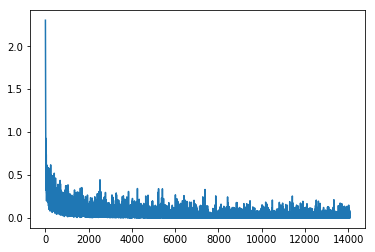

In [81]:
plt.plot(train_loss_Adam)
plt.show()

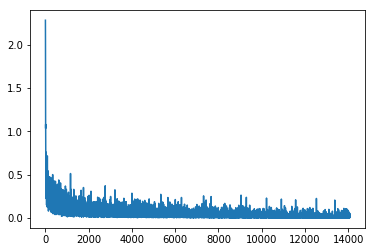

In [92]:
plt.plot(train_loss_Adagrad)
plt.show()

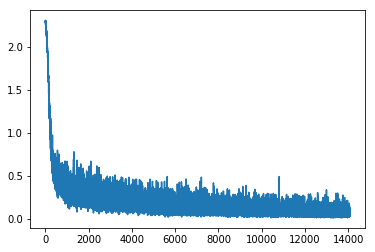

In [82]:
plt.plot(train_loss_SGD)
plt.show()

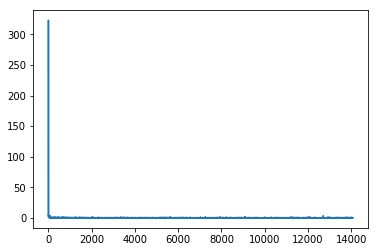

In [83]:
plt.plot(train_loss_RMSprop)
plt.show()

## 시작하기

지금 읽고 계신 문서는 Colaboratory에 호스팅된 [Jupyter 노트북](https://jupyter.org)입니다. 정적인 페이지가 아닌, Python 등의 언어로 코드를 작성하고 실행할 수 있는 대화형 환경입니다.

예를 들어 다음은 값을 계산하여 변수로 저장하고 결과를 출력하는 간단한 Python 스크립트를 포함한 **코드 셀**입니다.

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

위 셀의 코드를 실행하려면 셀을 클릭하여 선택한 후, 코드 왼쪽의 ▷ 버튼을 누르거나 단축키 '⌘/Ctrl+Enter'를 사용합니다.

모든 셀은 동일한 전역 상태를 수정하므로 셀을 실행하여 정의되는 변수는 다른 셀에서도 사용할 수 있습니다.

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

## 추가 리소스

다음 리소스를 통해 Python, Jupyter, Colaboratory 및 관련 도구를 최대한 활용하는 방법을 알아보세요.

### 머신러닝 단기집중과정
다음은 Google 온라인 머신러닝 과정의 일부 노트북입니다. [전체 과정 웹사이트](https://developers.google.com/machine-learning/crash-course/)에서 자세한 내용을 확인하세요.
- [Pandas 간단 소개](/notebooks/mlcc/intro_to_pandas.ipynb)
- [텐서플로우 프로그래밍 개념](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [텐서플로우 첫걸음](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [신경망 소개](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [희소 데이터 및 임베딩 소개](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### 머신러닝 예제: Seedbank

Colaboratory 덕분에 가능해진 대화형 머신러닝 분석의 예시를 자세히 살펴보려면 [Seedbank](https://research.google.com/seedbank/) 프로젝트를 확인하세요.

일부 추천 예시는 다음과 같습니다.

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): 딥 러닝을 사용하여 이미지 간에 스타일을 이전합니다.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): WaveNet 자동 인코더로 음성을 합성합니다.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): 딥 러닝으로 패션 관련 이미지를 분류합니다.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): 본인 사진으로 DeepDream 이미지를 만듭니다.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): 손으로 쓴 숫자의 생성 모델을 만듭니다.